In [64]:
# Student - Tim Tieng
# Program - MS in Applied Data Science
# Course - IST-718 Big Data Analytics
# Instructor - Professor Jill Lando

#Attestation
# I used the course materials and the following resources to complete this assignment:
# 1. https://stackoverflow.com/questions/20937538/how-to-display-pandas-dataframe-of-floats-using-a-format-string-for-columns
# 2. I prompted ChatGPT to assist me in providing code suggestions for the following topics: Strip() Syntax, Casting to a different Datype
#    groupby()
# 3. I prompted ChatGPT to assist me in the process to use to predict Syracuse' football coach salary. 

In [84]:
# Import Packages

import pandas as pd  # data frame operations
from pandas.plotting import scatter_matrix  # scatter plot matrix
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
from sklearn.tree import DecisionTreeRegressor  # machine learning tree
from sklearn.ensemble import RandomForestRegressor # ensemble method
import matplotlib.pyplot as plt # Visualizations
from matplotlib.ticker import FuncFormatter # Formatting Visualizations
import seaborn as sns
import statsmodels.api as sm # Statistical Modeling

In [66]:
# Read in the Data 1

# Filepath to coaches9.csv
csv_Filepath1 = "/Users/timtieng/Library/CloudStorage/OneDrive-Personal/Desktop/Masters in Applied Data Science/IST-718 Big Data Analytics/Labs/Lab 1/coaches9.csv"

# Create Dataframe
coaches_Raw = pd.read_csv(csv_Filepath1)
print(coaches_Raw.shape)
# 129 rows, 9 columns -> School, Conference, Coach, SchoolPay,TotalPay, Bonus, AssistantPay,Buyout

coaches_Raw


# Initial observations -
# 1. Discrepancies in datatypes in the numerical columns. Casting required
# 2. Stripping of $ signs and , 
# 3. Replacing '--' values with 0


(129, 9)


,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"
...,...,...,...,...,...,...,...,...,...
124,West Virginia,Big 12,Dana Holgorsen,"$3,605,000","$3,617,500","$1,000,000","$90,000",$0,"$7,150,000"
125,Western Kentucky,C-USA,Mike Sanford Jr.,"$800,000","$805,850","$400,000",$0,$0,"$1,200,000"
126,Western Michigan,MAC,Tim Lester,"$800,000","$800,000","$346,500","$39,250",$0,"$800,000"
127,Wisconsin,Big Ten,Paul Chryst,"$3,750,000","$3,750,000",--,"$290,000",$0,"$6,000,000"


In [67]:
# Replace -- values in anticipated numeric columns
coaches_Raw['SchoolPay'] = coaches_Raw['SchoolPay'].replace('--', '0')
coaches_Raw['TotalPay'] = coaches_Raw['TotalPay'].replace('--', '0')
coaches_Raw['Bonus'] = coaches_Raw['Bonus'].replace('--', '0')
coaches_Raw['BonusPaid'] = coaches_Raw['BonusPaid'].replace('--', '0')
coaches_Raw['AssistantPay'] = coaches_Raw['AssistantPay'].replace('--', '0')
coaches_Raw['Buyout'] = coaches_Raw['Buyout'].replace('--', '0')
# Test
coaches_Raw


,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,0,$0,0
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"
...,...,...,...,...,...,...,...,...,...
124,West Virginia,Big 12,Dana Holgorsen,"$3,605,000","$3,617,500","$1,000,000","$90,000",$0,"$7,150,000"
125,Western Kentucky,C-USA,Mike Sanford Jr.,"$800,000","$805,850","$400,000",$0,$0,"$1,200,000"
126,Western Michigan,MAC,Tim Lester,"$800,000","$800,000","$346,500","$39,250",$0,"$800,000"
127,Wisconsin,Big Ten,Paul Chryst,"$3,750,000","$3,750,000",0,"$290,000",$0,"$6,000,000"


In [68]:
# Clean Data  - Remove $ symbol and , then cast as a float datatype

# Convert 'SchoolPay' column to float
coaches_Raw['SchoolPay'] = coaches_Raw['SchoolPay'].str.strip('$').str.replace(',', '').astype(float).round(2)


# Convert 'TotalPay' column to float
coaches_Raw['TotalPay'] = coaches_Raw['TotalPay'].str.strip('$').str.replace(',', '').astype(float).round(2)


# Convert 'Bonus' column to float
coaches_Raw['Bonus'] = coaches_Raw['Bonus'].str.strip('$').str.replace(',', '').astype(float).round(2)


# Convert 'BonusPaid' column to float
coaches_Raw['BonusPaid'] = coaches_Raw['BonusPaid'].str.strip('$').str.replace(',', '').astype(float).round(2)


# Convert 'AssistantPay' column to float
coaches_Raw['AssistantPay'] = coaches_Raw['AssistantPay'].str.strip('$').str.replace(',', '').astype(float).round(2)


# Convert 'Buyout' column to float
coaches_Raw['Buyout'] = coaches_Raw['Buyout'].str.strip('$').str.replace(',', '').astype(float).round(2)

#Validate
coaches_Raw

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,"885,000.00","885,000.00","247,000.00",0.00,0.00,0.00
1,Akron,MAC,Terry Bowden,"411,000.00","412,500.00","225,000.00","50,000.00",0.00,"688,500.00"
2,Alabama,SEC,Nick Saban,"8,307,000.00","8,307,000.00","1,100,000.00","500,000.00",0.00,"33,600,000.00"
3,Alabama at Birmingham,C-USA,Bill Clark,"900,000.00","900,000.00","950,000.00","165,471.00",0.00,"3,847,500.00"
4,Appalachian State,Sun Belt,Scott Satterfield,"712,500.00","712,500.00","295,000.00","145,000.00",0.00,"2,160,417.00"
...,...,...,...,...,...,...,...,...,...
124,West Virginia,Big 12,Dana Holgorsen,"3,605,000.00","3,617,500.00","1,000,000.00","90,000.00",0.00,"7,150,000.00"
125,Western Kentucky,C-USA,Mike Sanford Jr.,"800,000.00","805,850.00","400,000.00",0.00,0.00,"1,200,000.00"
126,Western Michigan,MAC,Tim Lester,"800,000.00","800,000.00","346,500.00","39,250.00",0.00,"800,000.00"
127,Wisconsin,Big Ten,Paul Chryst,"3,750,000.00","3,750,000.00",0.00,"290,000.00",0.00,"6,000,000.00"


In [69]:
# Read in data set 2 -

# Filepath to NCAA_GSR_DATA_2016.csv
csv_Filepath2 = "/Users/timtieng/Library/CloudStorage/OneDrive-Personal/Desktop/Masters in Applied Data Science/IST-718 Big Data Analytics/Labs/Lab 1/NCAA_GSR_DATA_2016.csv"

# Create Dataframe
gsr_Raw = pd.read_csv(csv_Filepath2)
print(gsr_Raw.shape)# 260 Rows, 7 Attributes

gsr_Raw
# Initial Observations 
# 1. Discrepancies in numeric data type between GSR and FGR Field
# 2. Conference name seems to be different between both sets (conf vs conference, school names)
# 3. gsr data set has attributes that may not be needed (Sport, State, maybe Cohort)


(260, 7)


,Cohort,School,Conference,Sport,State,Graduate Success Rate,FGR
0,2016,Abilene Christian University,Western Athletic Conference,Football,TX,76,51.00
1,2016,University of Akron,Mid-American Conference,Football,OH,75,80.00
2,2016,Alabama A&M University,Southwestern Athletic Conf.,Football,AL,65,52.00
3,2016,Alabama State University,Southwestern Athletic Conf.,Football,AL,72,45.00
4,2016,University of Alabama,Southeastern Conference,Football,AL,93,62.00
...,...,...,...,...,...,...,...
255,2016,"University of Arkansas, Pine Bluff",Southwestern Athletic Conf.,Football,AR,70,43.00
256,2016,University of the Incarnate Word,Southland Conference,Football,TX,72,63.00
257,2016,Wofford College,Southern Conference,Football,SC,94,83.00
258,2016,Utah Tech University,Western Athletic Conference,Football,UT,50,27.00


In [70]:
# Observations - During Synchronous class, we were shared a modified CSV File using this

# Read in the Data 3 - Modified coaches with GSR

# Filepath to coaches9.csv
csv_Filepath3 = "/Users/timtieng/Library/CloudStorage/OneDrive-Personal/Desktop/Masters in Applied Data Science/IST-718 Big Data Analytics/Labs/Lab 1/coaches_modify.csv"

# Create Dataframe
coachesModified_Raw = pd.read_csv(csv_Filepath3)
print(coachesModified_Raw.shape)
# 118 rows, 22 columns -> School, Conference, Coach, SchoolPay,TotalPay, Bonus, AssistantPay,Buy

coachesModified_Raw

(118, 22)


,School,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,BonusMax,PayPlusBonus,StadSize,...,GSRank,Combo Rank,TrueRank,W,L,Ratio,OffenceScore,Defense Score,Score,PointsPerGame
0,Air Force,Mt. West,Troy Calhoun,"59,577,780.00",879288,454.55,454.55,126.86,454.55,46692,...,97,65,67,10.00,3.00,3.33,4.96,-0.87,4.09,78.16
1,Akron,MAC,Terry Bowden,"35,331,217.00",492413,211.09,211.86,115.56,237.54,30000,...,5,11,129,5.00,7.00,0.71,-0.40,-6.12,-6.52,72.64
2,Alabama,SEC,Nick Saban,"174,307,419.00",3929800,"4,266.56","4,266.56",564.97,"4,523.37",101821,...,84,111,5,14.00,1.00,14.00,8.01,17.62,25.62,90.38
3,Appalachian State,Sun Belt,Scott Satterfield,"35,058,621.00",675000,365.95,365.95,151.52,440.42,24050,...,13,20,122,10.00,3.00,3.33,-0.86,9.68,8.83,70.76
4,Arizona,Pac-12,Kevin Sumlin,"90,976,758.00",2752233,821.78,"1,027.22","1,040.06","1,027.22",51811,...,60,66,62,3.00,9.00,0.33,1.01,-5.64,-4.63,74.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Washington State,Pac-12,Mike Leach,"64,294,520.00",2752233,"1,797.64","1,797.64",372.37,"1,836.16",32248,...,121,83,37,8.00,5.00,1.60,5.70,3.33,9.03,84.22
114,West Virginia,Big 12,Dana Holgorsen,"110,565,870.00",3775000,"1,851.57","1,857.99",513.61,"1,904.21",60000,...,20,66,62,10.00,3.00,3.33,4.01,5.56,9.57,78.75
115,Western Michigan,MAC,Tim Lester,"38,516,531.00",492413,410.89,410.89,177.97,431.05,30200,...,60,39,100,13.00,1.00,13.00,7.61,4.42,12.03,86.24
116,Wisconsin,Big Ten,Paul Chryst,"143,420,668.00",3775000,"1,926.04","1,926.04",0.00,"2,074.99",80321,...,40,84,32,11.00,3.00,3.67,2.13,13.17,15.30,78.74


In [36]:
# Intial EDA 
# Determine how many null values per column in coachesModified_Raw
coachesModified_Raw.isna().sum()

# Observations
# 1. There are several columns with a lot of empty values. May need to omit depending on the output of the correlation matrix

School                      0
Conf                        0
Coach                       0
NCAAFBREV16                19
MedianConfSal               0
SchoolPay                   0
TotalPay                    0
BonusMax                    0
PayPlusBonus                0
StadSize                    0
 Graduation Rate (GSR)      0
 Seat Rank                  0
 GSRank                     0
 Combo Rank                 0
 TrueRank                   0
W                          11
L                          11
 Ratio                     11
OffenceScore               11
Defense Score              11
Score                      11
PointsPerGame              11
dtype: int64

In [71]:
# Initial EDA - Determine bi-variable relationships between the attributes
# Create a correlation matrix
correlation_matrix = coachesModified_Raw.corr()

# Print or use the correlation matrix as needed
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                         NCAAFBREV16   MedianConfSal  SchoolPay  TotalPay  \
NCAAFBREV16                      1.00           0.85       0.86      0.86   
MedianConfSal                    0.85           1.00       0.73      0.73   
SchoolPay                        0.86           0.73       1.00      1.00   
TotalPay                         0.86           0.73       1.00      1.00   
BonusMax                         0.46           0.40       0.36      0.37   
PayPlusBonus                     0.88           0.74       0.98      0.98   
StadSize                         0.88           0.69       0.73      0.73   
 Graduation Rate (GSR)           0.16           0.09       0.11      0.11   
 Seat Rank                       0.86           0.72       0.70      0.70   
 GSRank                          0.18           0.11       0.13      0.13   
 Combo Rank                      0.83           0.73       0.78      0.78   
 TrueRank                       -0.82          -0.73    

/var/folders/2v/fpmgsfs53sj24d_ptjz24_2r0000gn/T/ipykernel_1748/1992378713.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = coachesModified_Raw.corr()


/var/folders/2v/fpmgsfs53sj24d_ptjz24_2r0000gn/T/ipykernel_1748/55542027.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = coachesModified_Raw.corr()


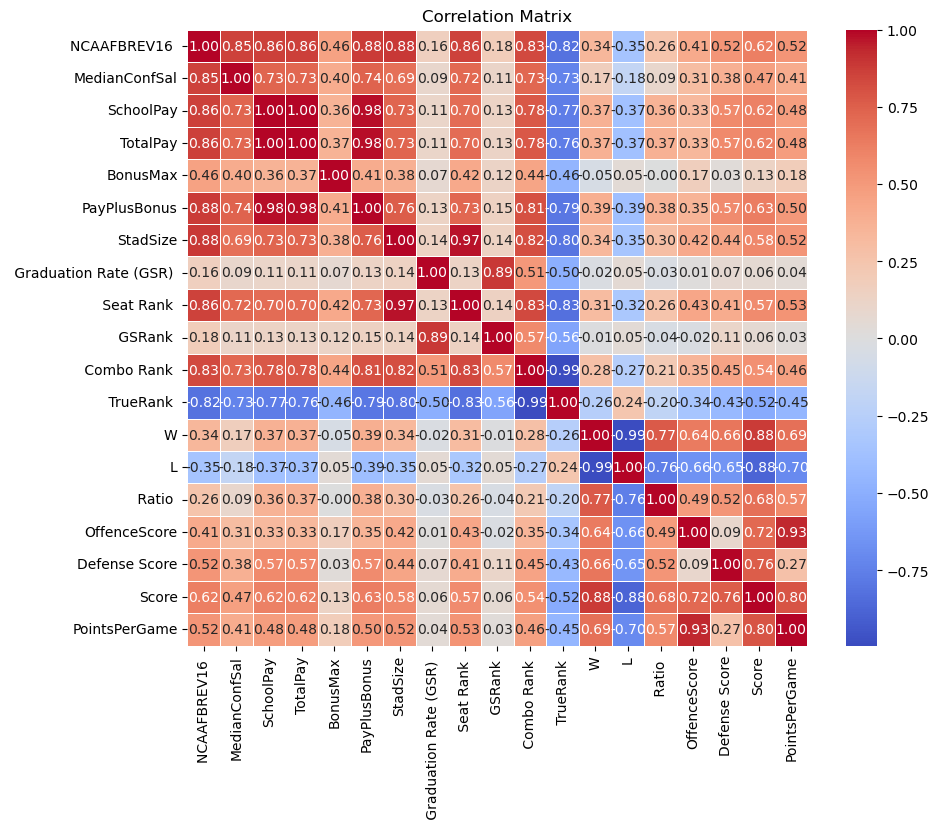

In [72]:
# Correlation Matrix part 2 - Easier visualiaation vs tabluar data
correlation_matrix = coachesModified_Raw.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [73]:
# EDA - Get number of Conferences

# Get Distinct Conference values
distinctConferencesCount = coachesModified_Raw['Conf'].nunique()
print("Number of distinct conferences:", distinctConferencesCount,'\n')

# Display the conference values
uniqueConferences = coachesModified_Raw['Conf'].unique()
print("Unique conference values:", uniqueConferences)

Number of distinct conferences: 11 

Unique conference values: ['Mt. West' 'MAC' 'SEC' 'Sun Belt' 'Pac-12' 'Ind.' 'Big 12' 'ACC' 'AAC'
 'C-USA' 'Big Ten']


In [45]:
# EDA Cont.
# Group by School and and get values for each school (Original data)
numericValuesBySchool = pd.DataFrame(coaches_Raw.groupby('School')[['SchoolPay', 'TotalPay', 'Bonus', 'AssistantPay', 'Buyout']].sum())
numericValuesBySchool


,SchoolPay,TotalPay,Bonus,AssistantPay,Buyout
School,,,,,
Air Force,885000,885000,247000,$0,--
Akron,"$411,000","$412,500","$225,000",$0,"$688,500"
Alabama,"$8,307,000","$8,307,000","$1,100,000",$0,"$33,600,000"
Alabama at Birmingham,"$900,000","$900,000","$950,000",$0,"$3,847,500"
Appalachian State,"$712,500","$712,500","$295,000",$0,"$2,160,417"
...,...,...,...,...,...
West Virginia,"$3,605,000","$3,617,500","$1,000,000",$0,"$7,150,000"
Western Kentucky,"$800,000","$805,850","$400,000",$0,"$1,200,000"
Western Michigan,"$800,000","$800,000","$346,500",$0,"$800,000"


In [74]:
# EDA Cont.
# Group by coachesModified School and and get values for each school (Modified/Combined Data from Sync Class)
numericValuesBySchool = pd.DataFrame(coachesModified_Raw.groupby('School')[['SchoolPay', 'TotalPay', 'BonusMax', 'PayPlusBonus', 'StadSize']].sum())
numericValuesBySchool


,SchoolPay,TotalPay,BonusMax,PayPlusBonus,StadSize
School,,,,,
Air Force,454.55,454.55,126.86,454.55,46692
Akron,211.09,211.86,115.56,237.54,30000
Alabama,"4,266.56","4,266.56",564.97,"4,523.37",101821
Appalachian State,365.95,365.95,151.52,440.42,24050
Arizona,821.78,"1,027.22","1,040.06","1,027.22",51811
...,...,...,...,...,...
Washington State,"1,797.64","1,797.64",372.37,"1,836.16",32248
West Virginia,"1,851.57","1,857.99",513.61,"1,904.21",60000
Western Michigan,410.89,410.89,177.97,431.05,30200


In [75]:
# Calculate average of all numerical values and group by conference
averageValuesByConference2 = coachesModified_Raw.groupby('Conf')[['SchoolPay', 'TotalPay', 'BonusMax', 'PayPlusBonus']].mean()

# Original output was not human-readable
# Set a custom float format with commas and 2 decimal places
pd.options.display.float_format = '{:,.2f}'.format

print("Average of Numerical Values by Conference:")
averageValuesByConference2

Average of Numerical Values by Conference:


,SchoolPay,TotalPay,BonusMax,PayPlusBonus
Conf,,,,
AAC,708.90,708.90,203.20,726.19
ACC,"1,751.22","1,763.63",376.14,"1,839.57"
Big 12,"1,856.74","1,857.39",418.85,"1,915.55"
Big Ten,"2,210.59","2,210.59",505.97,"2,287.45"
C-USA,417.31,417.31,326.14,427.58
Ind.,421.94,421.94,44.94,425.36
MAC,297.81,297.87,192.58,322.76
Mt. West,513.94,516.66,368.39,595.03
Pac-12,"1,467.17","1,484.40",641.16,"1,528.32"


<Figure size 1200x800 with 0 Axes>

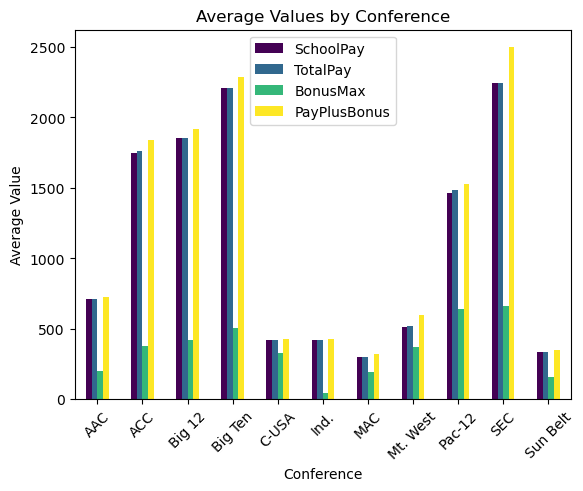

In [76]:
# Visualize - Average of Attributes by Conference
plt.figure(figsize=(12, 8))
averageValuesByConference2.plot(kind='bar', rot=45, colormap='viridis', legend=True)
plt.title('Average Values by Conference')
plt.xlabel('Conference')
plt.ylabel('Average Value')
plt.show()


In [103]:
# Study Question - Geographic Visualization of the median Total Salary by Conference

# Median Salary by Conference
# Calculate the median salary by conference
medianSalaryByConference = coachesModified_Raw.groupby('Conf')['PayPlusBonus'].median()

# Print or use the result as needed
print("Median 'Pay + Bonus' by Conference:")
medianSalaryByConference


Median 'Pay + Bonus' by Conference:


Conf
AAC          808.21
ACC        1,684.65
Big 12     2,023.36
Big Ten    2,197.08
C-USA        427.58
Ind.         373.02
MAC          271.18
Mt. West     475.09
Pac-12     1,489.85
SEC        2,091.94
Sun Belt     346.69
Name: PayPlusBonus, dtype: float64

In [104]:
# Study Question - Geographic Visualization on Average total Salary by Conference

# Median Salary by Conference
# Calculate the median salary by conference
meanSalaryByConference = coachesModified_Raw.groupby('Conf')['PayPlusBonus'].mean()

# Print or use the result as needed
print("Average 'Pay + Bonus' by Conference:")
meanSalaryByConference

Average 'Pay + Bonus' by Conference:


Conf
AAC          726.19
ACC        1,839.57
Big 12     1,915.55
Big Ten    2,287.45
C-USA        427.58
Ind.         425.36
MAC          322.76
Mt. West     595.03
Pac-12     1,528.32
SEC        2,498.66
Sun Belt     352.41
Name: PayPlusBonus, dtype: float64

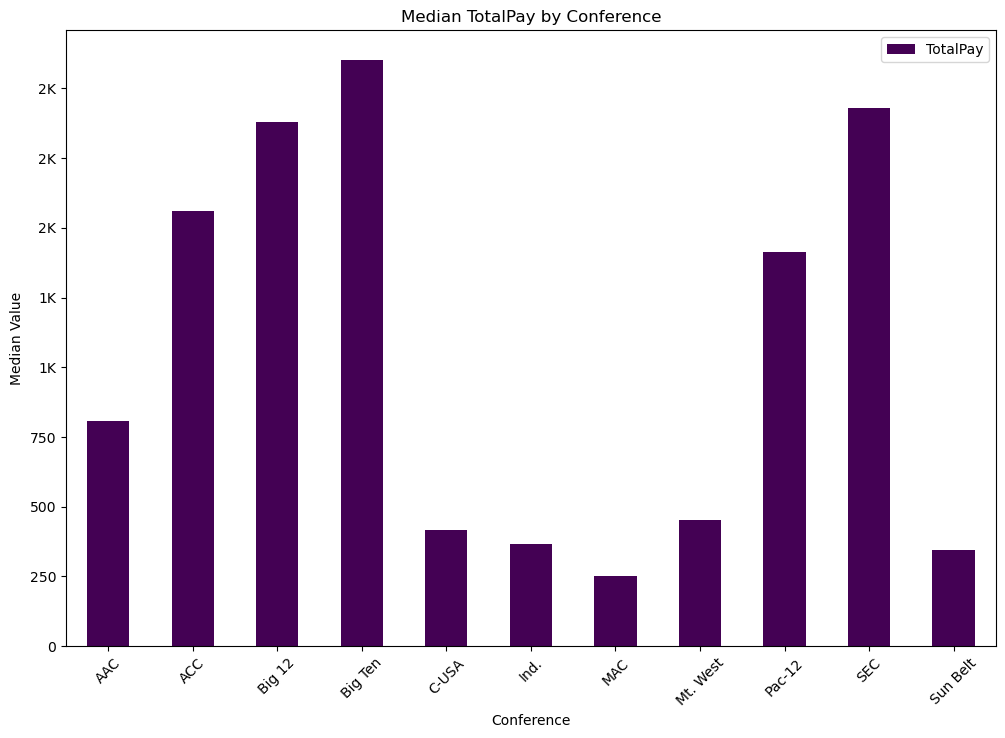

In [79]:
# Visualize - Median of TotalPay by Conference
def custom_formatter(x, pos):
    if x >= 1e6:
        return '{:,.1f}M'.format(x * 1e-6)
    elif x >= 1e3:
        return '{:,.0f}K'.format(x * 1e-3)
    else:
        return '{:,.0f}'.format(x)

# Plotting
plt.figure(figsize=(12, 8))
ax = medianSalaryByConference.plot(kind='bar', rot=45, colormap='viridis', legend=True)

# Apply the custom formatter to the y-axis labels
ax.yaxis.set_major_formatter(FuncFormatter(custom_formatter))

plt.title('Median TotalPay by Conference')
plt.xlabel('Conference')
plt.ylabel('Median Value')
plt.show()

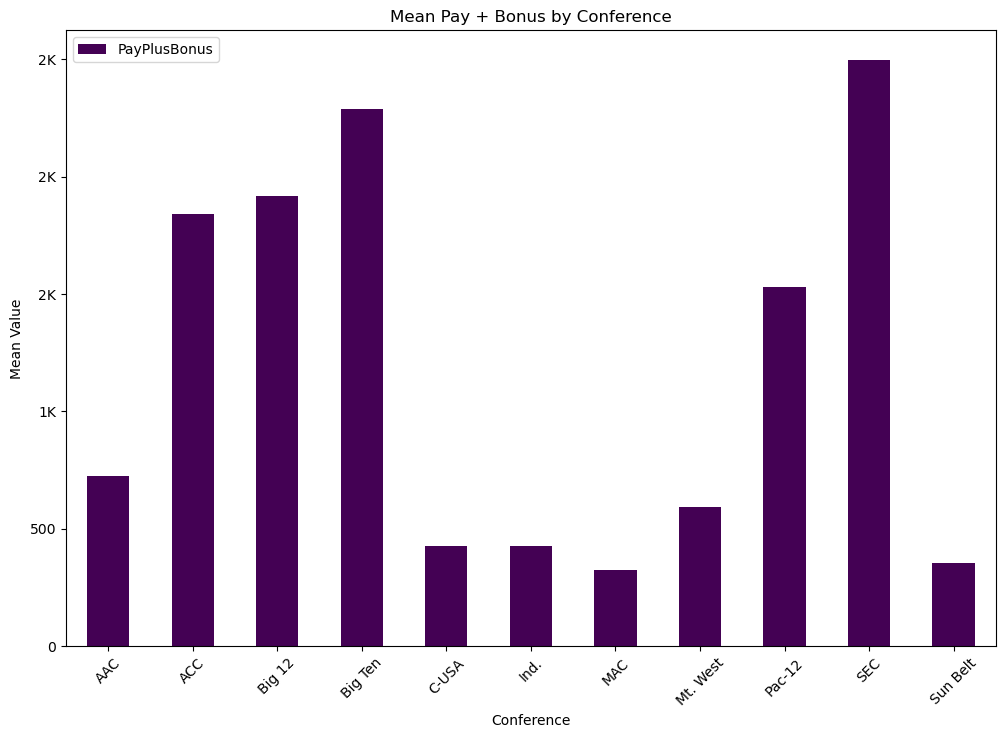

In [83]:
# Visualize - Mean of TotalPay by Conference
def custom_formatter(x, pos):
    if x >= 1e6:
        return '{:,.1f}M'.format(x * 1e-6)
    elif x >= 1e3:
        return '{:,.0f}K'.format(x * 1e-3)
    else:
        return '{:,.0f}'.format(x)

# Plotting
plt.figure(figsize=(12, 8))
ax = meanSalaryByConference.plot(kind='bar', rot=45, colormap='viridis', legend=True)

# Apply the custom formatter to the y-axis labels
ax.yaxis.set_major_formatter(FuncFormatter(custom_formatter))

plt.title('Mean Pay + Bonus by Conference')
plt.xlabel('Conference')
plt.ylabel('Mean Value')
plt.show()

In [90]:
# Model - Statistical Model 
# Use the top variables in the correlation matrix to asses PayPlusBonus

# Input the variables with over .80 values in correlation matrix
# Defining the response variable and predictor variables
X = coachesModified_Raw[['SchoolPay', 'TotalPay', ' Combo Rank ']]  # Predictor variables
Y = coachesModified_Raw['PayPlusBonus']                 # Response variable

# Adding a constant to the model (for the intercept)
X = sm.add_constant(X)

# Creating the model
model = sm.OLS(Y, X).fit()

# Viewing the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           PayPlusBonus   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1064.
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           3.64e-83
Time:                        07:54:02   Log-Likelihood:                -787.94
No. Observations:                 118   AIC:                             1584.
Df Residuals:                     114   BIC:                             1595.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -121.0124     48.526     -2.494   

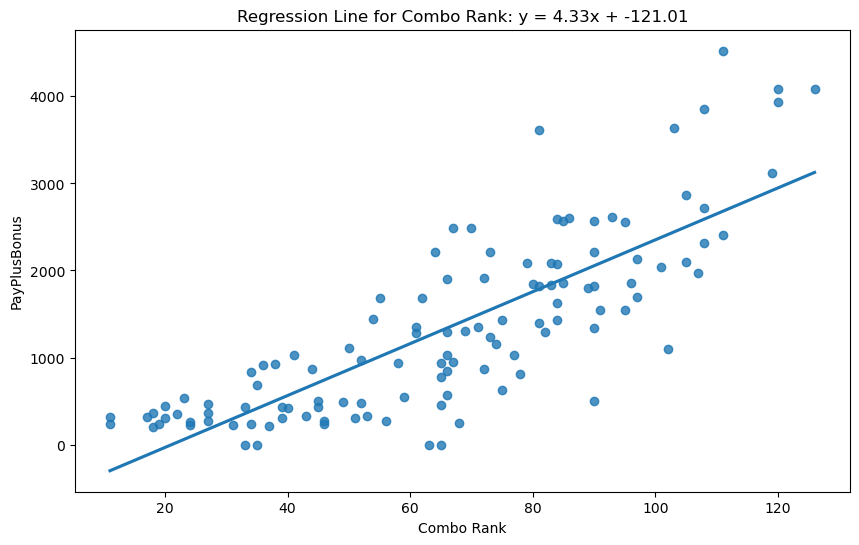

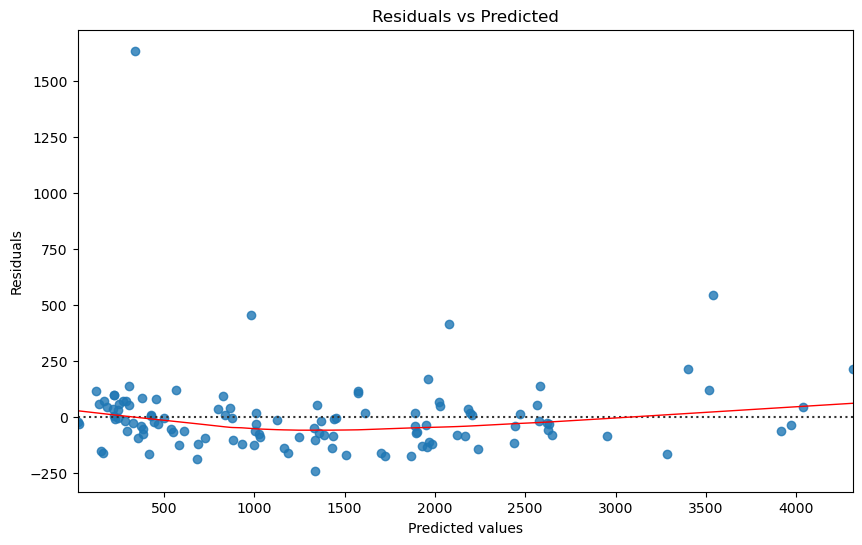

In [99]:
# Visualize the statistical model

predictions = model.predict(X)  # X is your dataframe of predictors

# Scatter plot with regression line for 'Combo Rank'
# Extracting the slope (m) and intercept (b) for 'Combo Rank'
m = model.params[' Combo Rank ']
b = model.params['const']

# Creating a scatter plot with regression line for 'Combo Rank'
plt.figure(figsize=(10, 6))
sns.regplot(x=coachesModified_Raw[' Combo Rank '], y=coachesModified_Raw['PayPlusBonus'], ci=None)
plt.title(f"Regression Line for Combo Rank: y = {m:.2f}x + {b:.2f}")
plt.xlabel("Combo Rank")
plt.ylabel("PayPlusBonus")
plt.show()
# Residuals plot
plt.figure(figsize=(10, 6))
sns.residplot(x=predictions, y=model.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

In [101]:
# Syracuse Football coach study question - what should the coaches salary be?

# Filter the dataframe for Syracuse
syracuse_data = coachesModified_Raw[coachesModified_Raw['School'] == 'Syracuse']

# Display the data for Syracuse
syracuse_data


,School,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,BonusMax,PayPlusBonus,StadSize,...,GSRank,Combo Rank,TrueRank,W,L,Ratio,OffenceScore,Defense Score,Score,PointsPerGame
93,Syracuse,ACC,Dino Babers,NaN,2458033,"1,233.29","1,233.29",0.00,"1,233.29",49250,...,87,73,49,4.00,8.00,0.50,0.08,-4.59,-4.51,75.51


In [102]:
# Create variables for the pertinant attributes:

# Example values for the Syracuse football coach
school_pay = syracuse_data['SchoolPay']
total_pay = syracuse_data['TotalPay']
combo_rank = syracuse_data[' Combo Rank ']

# Creating a DataFrame for the input variables
input_data = pd.DataFrame({'SchoolPay': [school_pay],
                           'TotalPay': [total_pay],
                           'Combo Rank': [combo_rank]})

# Adding a constant to the input data
input_data = sm.add_constant(input_data)

# Making a prediction
predicted_salary = model.predict(input_data)
print("Predicted Salary for Syracuse Football Coach:", predicted_salary[0])


Predicted Salary for Syracuse Football Coach: 93   1,337.38
dtype: float64
